In [1]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

import seaborn as sns
import matplotlib.pyplot as plt

from tqdm.auto import tqdm
import time
import spacy
from spacy import displacy


In [2]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [24]:
pip install spacy

  Obtaining dependency information for spacy from https://files.pythonhosted.org/packages/92/fb/d1f0605e1e8627226c6c96053fe1632e9a04a3fbcd8b5d715528cb95eb97/spacy-3.7.4-cp311-cp311-win_amd64.whl.metadata
  Using cached spacy-3.7.4-cp311-cp311-win_amd64.whl.metadata (27 kB)
  Obtaining dependency information for spacy-legacy<3.1.0,>=3.0.11 from https://files.pythonhosted.org/packages/c3/55/12e842c70ff8828e34e543a2c7176dac4da006ca6901c9e8b43efab8bc6b/spacy_legacy-3.0.12-py2.py3-none-any.whl.metadata
  Using cached spacy_legacy-3.0.12-py2.py3-none-any.whl.metadata (2.8 kB)
  Obtaining dependency information for spacy-loggers<2.0.0,>=1.0.0 from https://files.pythonhosted.org/packages/33/78/d1a1a026ef3af911159398c939b1509d5c36fe524c7b644f34a5146c4e16/spacy_loggers-1.0.5-py3-none-any.whl.metadata
  Using cached spacy_loggers-1.0.5-py3-none-any.whl.metadata (23 kB)
  Obtaining dependency information for murmurhash<1.1.0,>=0.28.0 from https://files.pythonhosted.org/packages/71/46/af01a20ec368b

In [29]:
!python -m spacy download en_core_web_sm


     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 165.2 kB/s eta 0:01:18
     --------------------------------------- 0.0/12.8 MB 165.2 kB/s eta 0:01:18
     --------------------------------------- 0.0/12.8 MB 163.8 kB/s eta 0:01:18
     --------------------------------------- 0.0/12.8 MB 164.3 kB/s eta 0:01:18
     --------------------------------------- 0.0/12.8 MB 164.3 kB/s eta 0:01:18
     --------------------------------------- 0.1/12.8 MB 182.2 kB/s eta 0:01:10
     --------------------------------------- 0.1/12.8 MB 218.5 kB/s eta 0:00:59
     --------------------------------------- 0.1/12.8 MB 228.2 kB/s eta 0:00:56
     --------------------------------------- 0.1/12.8 MB 257.8 kB/s eta 0:00:50
     --------------------------------------- 0.1/12.8 MB 275.0 kB/s eta 0:00:47
      -------------------------------------- 0.2/12.8 MB

In [32]:
!pip install pyLDAvis

  Obtaining dependency information for pyLDAvis from https://files.pythonhosted.org/packages/6b/5a/66364c6799f2362bfb9b7100bc1ce6ffcdfe7f17e8d2e85a591bfe427643/pyLDAvis-3.4.1-py3-none-any.whl.metadata
  Obtaining dependency information for funcy from https://files.pythonhosted.org/packages/d5/08/c2409cb01d5368dcfedcbaffa7d044cc8957d57a9d0855244a5eb4709d30/funcy-2.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for FuzzyTM>=0.4.0 from https://files.pythonhosted.org/packages/06/4d/8d2dd5d81afdea2aa790860d5c7e12f80154923ba827e3fa36759f0bf2cd/FuzzyTM-2.0.5-py3-none-any.whl.metadata
  Obtaining dependency information for pyfume from https://files.pythonhosted.org/packages/0f/81/8f35156b9af9c9585de8518b354e42bcaf3ee3e5a77e530613c37de22b1e/pyFUME-0.2.25-py3-none-any.whl.metadata
  Obtaining dependency information for simpful from https://files.pythonhosted.org/packages/8d/93/8448d3f1aa9d2911b8cba2602aaa1af85eb31a26d28b7b737f1fa5b40c02/simpful-2.11.1-py3-none-any.whl.metadat

In [2]:
df = pd.read_csv('cyberbullying_tweets.csv', nrows = 20000)
df

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying
...,...,...
19995,I am Christian who definitely does not support...,religion
19996,@yousufpoosuf @RKingLive2Dance @izrinhariri No...,religion
19997,How can you say Barack Obama was the best pres...,religion
19998,Another Mentally ill asylum seeker. WTHell do ...,religion


In [3]:
df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [4]:
df.shape

(20000, 2)

In [5]:
df.isna().any()

tweet_text            False
cyberbullying_type    False
dtype: bool

In [6]:
df.isna().sum()

tweet_text            0
cyberbullying_type    0
dtype: int64

In [7]:
df.nunique()

tweet_text            19915
cyberbullying_type        3
dtype: int64

In [8]:
df['tweet_text'].nunique()

19915

In [9]:
df['cyberbullying_type'].value_counts()

cyberbullying_type
gender               7973
not_cyberbullying    7945
religion             4082
Name: count, dtype: int64

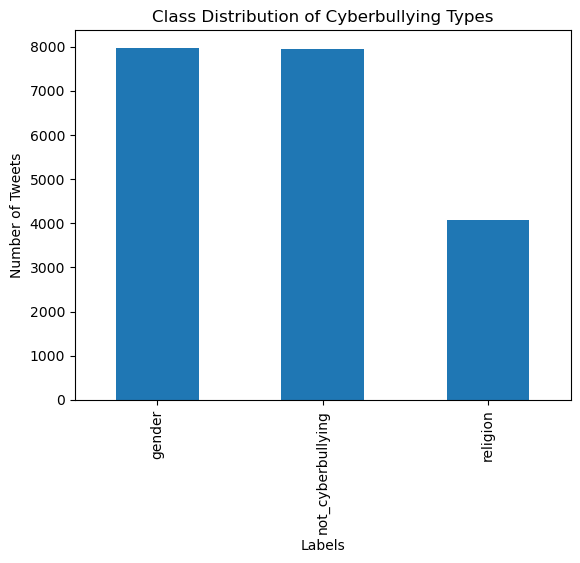

In [10]:
class_counts = df['cyberbullying_type'].value_counts()
class_counts.plot(kind='bar')
plt.title('Class Distribution of Cyberbullying Types')
plt.xlabel('Labels')
plt.ylabel('Number of Tweets')
plt.show()


In [11]:
from collections import Counter
import re

import nltk
from nltk.corpus import stopwords

In [12]:
import re
import nltk
from tqdm import tqdm
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

def clean_text(text):
    text = re.sub('<.*?>', '', text)
    
    text = re.sub('[^a-zA-Z]', ' ', text).lower()

    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'#\S+', '', text)
    
    words = nltk.word_tokenize(text)
    
    words = [w for w in words if w not in stopwords.words('english')]
    
    stemmer = PorterStemmer()
    words = [stemmer.stem(w) for w in words]

    text = ' '.join(words)
    return text

In [13]:
all_text = ' '.join(df['tweet_text'].values)
all_text = re.sub(r'http\S+', '', all_text)
all_text = re.sub(r'@\S+', '', all_text)
all_text = re.sub(r'#\S+', '', all_text)
words = all_text.split()

In [14]:
stop_words = set(stopwords.words('english'))
words = [word for word in words if not word in stop_words]

In [15]:
word_counts = Counter(words)
top_words = word_counts.most_common(100)
top_words

[('I', 5256),
 ('rape', 2962),
 ('gay', 2507),
 ('RT', 2103),
 ('jokes', 2038),
 ('like', 1739),
 ('people', 1336),
 ("I'm", 1167),
 ('&amp;', 1117),
 ('joke', 1114),
 ('The', 1021),
 ('call', 955),
 ('u', 942),
 ('You', 932),
 ('think', 896),
 ('get', 863),
 ('make', 862),
 ('women', 811),
 ('know', 739),
 ('one', 738),
 ('Muslim', 733),
 ('Muslims', 728),
 ('female', 703),
 ('sexist', 668),
 ('-', 650),
 ('And', 638),
 ('would', 637),
 ('jokes,', 615),
 ('Christian', 605),
 ('woman', 571),
 ('If', 561),
 ('support', 560),
 ('say', 542),
 ('even', 523),
 ('want', 520),
 ('see', 512),
 ('right', 504),
 ('men', 502),
 ('idiots', 488),
 ('never', 483),
 ('still', 469),
 ('But', 467),
 ('made', 458),
 ('go', 456),
 ('really', 451),
 ('idiot', 447),
 ('This', 445),
 ('A', 444),
 ('So', 443),
 ('making', 443),
 ('.', 430),
 ('Islamic', 429),
 ('bitch', 428),
 ('need', 418),
 ("can't", 412),
 ('hate', 410),
 ('Rape', 409),
 ('Kat', 399),
 ('What', 390),
 ('They', 386),
 ('said', 384),
 ('bul

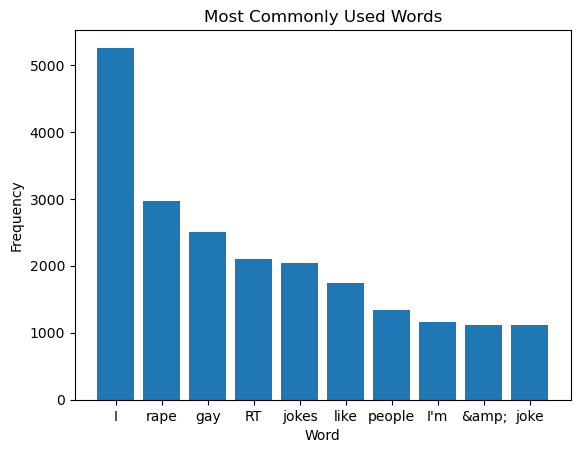

In [16]:
top_words = word_counts.most_common(10)
x_values = [word[0] for word in top_words]
y_values = [word[1] for word in top_words]
plt.bar(x_values, y_values)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Most Commonly Used Words')
plt.show()

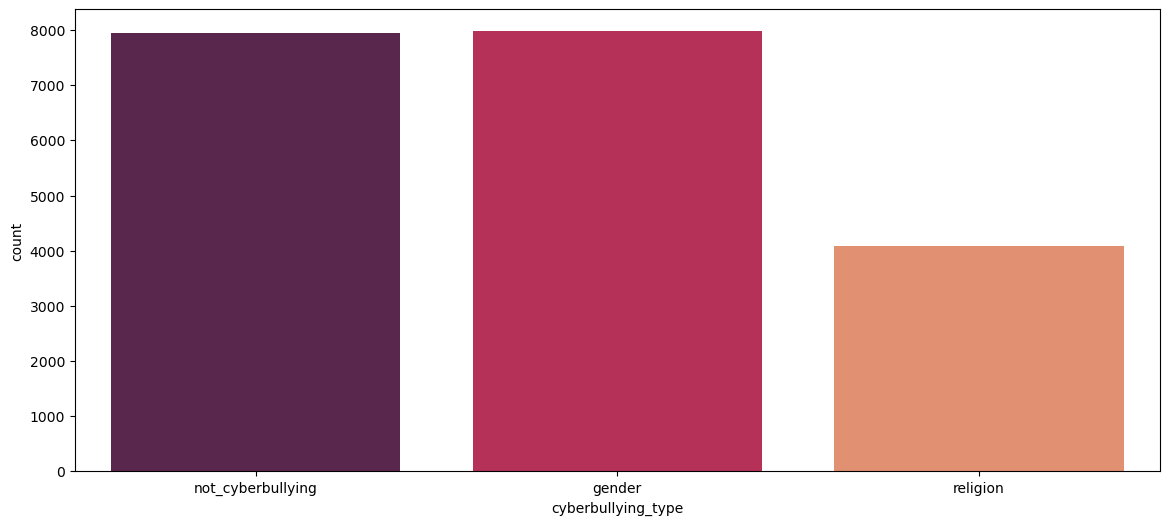

In [17]:
plt.figure(figsize=(14, 6))
sns.countplot(x='cyberbullying_type', data=df, palette='rocket')
plt.show()

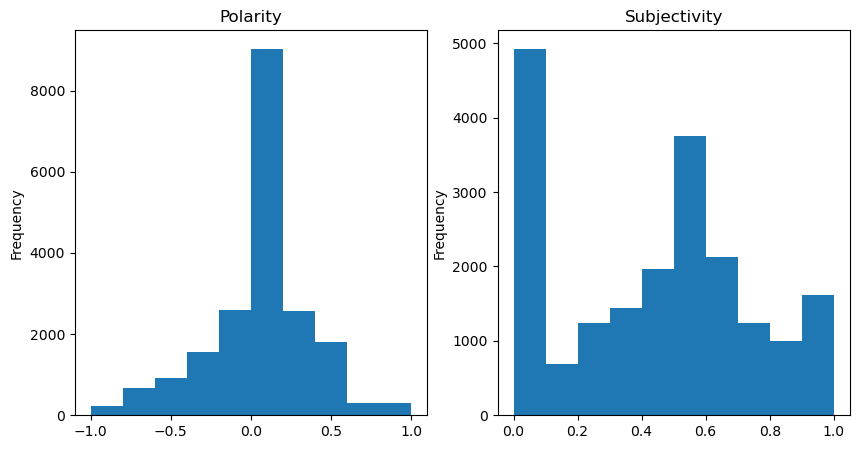

In [20]:
from textblob import TextBlob

sentiment_scores = []
for text in df['tweet_text']:
    analysis = TextBlob(text)
    sentiment_scores.append((analysis.sentiment.polarity, analysis.sentiment.subjectivity))

sentiment_df = pd.DataFrame(sentiment_scores, columns=['polarity', 'subjectivity'])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
sentiment_df['polarity'].plot(kind='hist', ax=axes[0], title='Polarity')
sentiment_df['subjectivity'].plot(kind='hist', ax=axes[1], title='Subjectivity')
plt.show()

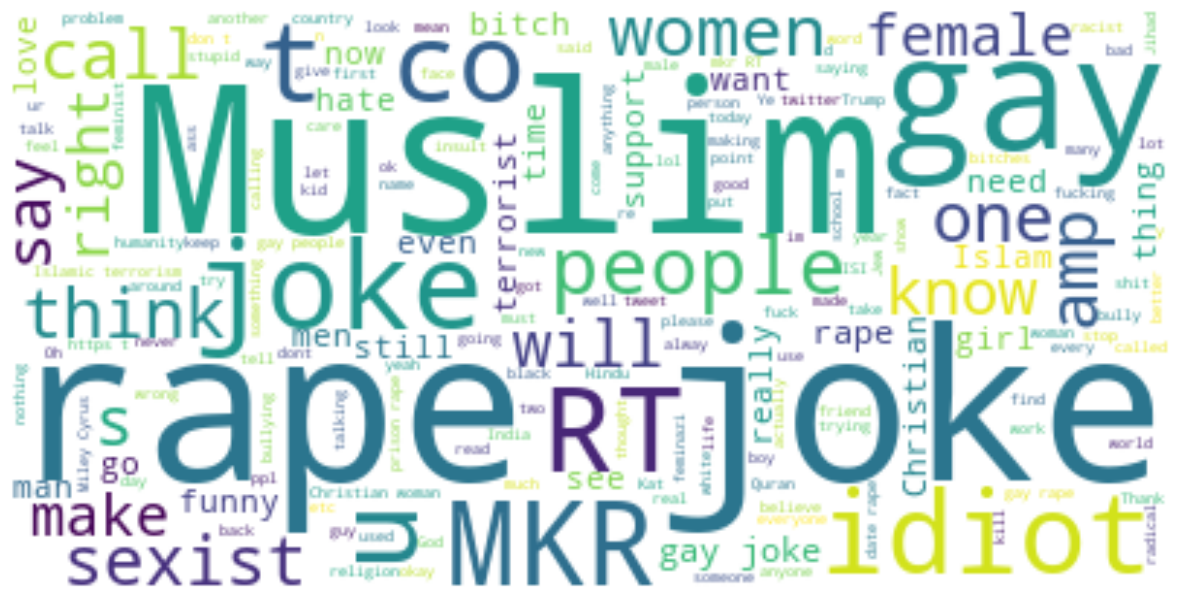

In [22]:
from wordcloud import WordCloud, STOPWORDS

text = " ".join(i for i in df.tweet_text)

stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [23]:
text = df['tweet_text'].iloc[4]

nlp = spacy.load('en_core_web_sm')

doc = nlp(text)

displacy.render(doc, style='ent', jupyter=True)

In [24]:
import gensim
import pyLDAvis 
from pyLDAvis import *
import pyLDAvis.gensim as gensimvis

tokens = [[word for word in sentence.split()] for sentence in df['tweet_text']]
dictionary = gensim.corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]

num_topics = 10
lda_model = gensim.models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)

pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.258666 -0.000708       1        1  46.198249
0      0.195690 -0.003881       2        1  15.484235
2      0.028641 -0.028522       3        1   7.408658
8      0.091003 -0.044680       4        1   7.366631
1     -0.040751  0.224740       5        1   5.604094
9      0.022039 -0.090443       6        1   5.042269
4     -0.006399  0.075774       7        1   4.962616
3     -0.066388 -0.077578       8        1   3.588291
6     -0.212919 -0.042977       9        1   3.126074
5     -0.269582 -0.011726      10        1   1.218883, topic_info=         Term          Freq         Total Category  logprob  loglift
8069     rape   2437.000000   2437.000000  Default  30.0000  30.0000
1141      gay   2361.000000   2361.000000  Default  29.0000  29.0000
5833    jokes   1697.000000   1697.000000  Default  28.0000  28.0000
64         to  10115.000000  10115.000000  Default  27.0000  27.0000
236       and   9287.000000   9287.000000  Default  26.0000  26.0000
...       ...           ...           ...      ...      ...      ...
324         ?     29.905113    242.019966  Topic10  -5.1738   2.3162
1731     More     14.933018     36.594644  Topic10  -5.8682   3.5109
1726   women.     14.433277     72.378046  Topic10  -5.9022   2.7949
1814  Islamic     17.073489    948.122202  Topic10  -5.7343   0.3903
125        RT     14.971375   1355.745054  Topic10  -5.8656  -0.0987

[646 rows x 6 columns], token_table=       Topic      Freq    Term
term                          
8062       5  0.985949  #Islam
8062       9  0.007643  #Islam
10         1  0.217370    #MKR
10         2  0.104338    #MKR
10         3  0.040576    #MKR
...      ...       ...     ...
8          8  0.009614    your
8          9  0.003205    your
8         10  0.000534    your
8689       2  0.998164  you’re
20317      4  0.992150       “

[1306 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 1, 3, 9, 2, 10, 5, 4, 7, 6])

In [27]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from tqdm import tqdm

tqdm.pandas()
df['cleaned_text'] = df['tweet_text'].progress_apply(clean_text)

100%|██████████| 20000/20000 [00:09<00:00, 2088.83it/s]


In [30]:
cv = CountVectorizer()
X = cv.fit_transform(df['cleaned_text']).toarray()
y = df['cyberbullying_type']

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
clf = LogisticRegression(max_iter = 1000)

In [33]:
clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [34]:
from sklearn.metrics import accuracy_score

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.8975


<Axes: >

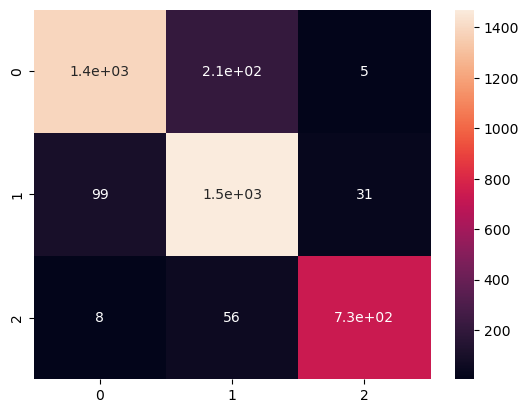

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True)


In [36]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

                   precision    recall  f1-score   support

           gender       0.93      0.87      0.90      1602
not_cyberbullying       0.85      0.92      0.88      1600
         religion       0.95      0.92      0.94       798

         accuracy                           0.90      4000
        macro avg       0.91      0.90      0.90      4000
     weighted avg       0.90      0.90      0.90      4000



In [37]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [38]:
y_pred = classifier.predict(X_test)

In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[934  83 585]
 [461 357 782]
 [ 86  39 673]]


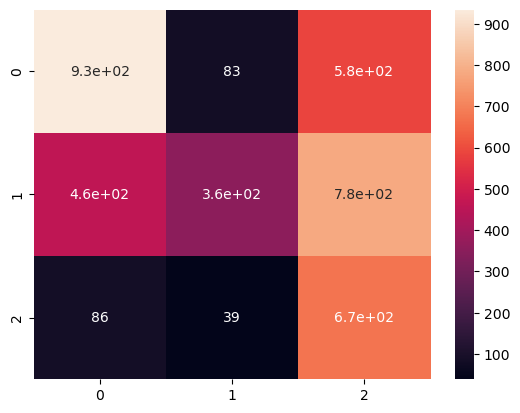

In [40]:
sns.heatmap(cm,annot =True)
plt.show()

In [41]:
acc1 = accuracy_score(y_test, y_pred)

In [42]:
print(f"Accuracy of Naive Bayes (Using Bag of words technique): {acc1}")

Accuracy of Naive Bayes (Using Bag of words technique): 0.491


In [43]:
y=df['cyberbullying_type']

In [44]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [45]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X1_train, y1_train)
GaussianNB()
y1_pred = classifier.predict(X1_test)

In [46]:
acc2 = accuracy_score(y1_test, y1_pred)

In [47]:
print(f"Accuracy of Naive Bayes (Using TF - IDF technique): {acc2}")

Accuracy of Naive Bayes (Using TF - IDF technique): 0.52975


In [48]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()
classifier.fit(X1_train, y1_train)
pred = classifier.predict(X1_test)
pred = classifier.predict(X1_test)
score = accuracy_score(y1_test, pred)

In [49]:
score

0.83025

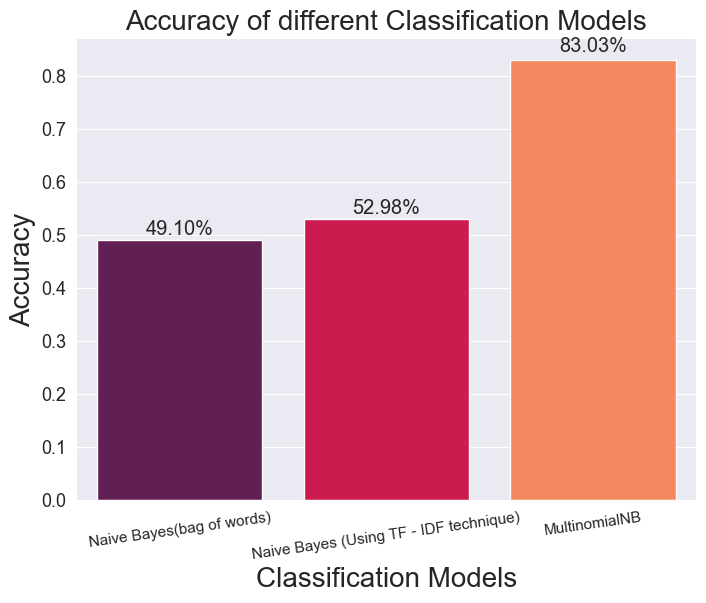

In [50]:
mylist=[]
mylist2=[]
mylist.append(acc1)
mylist2.append("Naive Bayes(bag of words)")
mylist.append(acc2)
mylist2.append("Naive Bayes (Using TF - IDF technique)")
mylist.append(score)
mylist2.append("MultinomialNB")
plt.rcParams['figure.figsize']=8,6
sns.set_style("darkgrid")
ax = sns.barplot(x=mylist2, y=mylist, palette = "rocket", saturation =1.5)
plt.xlabel("Classification Models", fontsize = 20 )
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Accuracy of different Classification Models", fontsize = 20)
plt.xticks(fontsize = 11, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()